In [69]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

pd.options.display.max_columns = 150

In [70]:
import pandas as pd
#data = pd.read_csv('NA_NB_1_20181126.csv')
#data = pd.read_csv('NA_NB_direct.csv')
rnb = pd.read_csv('rnb1015_2 AllVars.csv')
#rnb = pd.read_csv('rnb1015_2_All.csv')
#data = pd.read_csv('rnb1015_2_AMR_NotPaid.csv')
#data.shape
rnb.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216
1,2016-01-01,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795
2,2016-01-01,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
3,2016-01-01,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424
4,2016-01-01,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480


In [71]:
rnb.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216
1,2016-01-01,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795
2,2016-01-01,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
3,2016-01-01,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424
4,2016-01-01,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480


In [72]:
rnb_AMR = rnb[(rnb.region == 'AMR') & (rnb.marketing == 'NotPaid')]

In [73]:
rnb_AMR.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08,144695.8942,10242216
10,2016-01-02,AMR,NotPaid,1346779,6789,75141,7194,681,6513,554396.44,176412.8379,10236960
20,2016-01-03,AMR,NotPaid,1563675,8132,93361,8307,705,7602,532272.17,205835.1187,10239648
30,2016-01-04,AMR,NotPaid,1755009,9101,101760,9982,1111,8871,1030987.00,249086.6228,10233168
40,2016-01-05,AMR,NotPaid,1761816,9876,108097,11051,1223,9828,1177099.90,271275.1296,10255176


In [74]:
# to drop current index adn create a new one in sequence
rnb_AMR = rnb_AMR.reset_index().drop(columns=['index'])
#pf = pf.reset_index().drop(columns=['index'])
rnb_AMR.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,2016-01-01,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08,144695.8942,10242216
1,2016-01-02,AMR,NotPaid,1346779,6789,75141,7194,681,6513,554396.44,176412.8379,10236960
2,2016-01-03,AMR,NotPaid,1563675,8132,93361,8307,705,7602,532272.17,205835.1187,10239648
3,2016-01-04,AMR,NotPaid,1755009,9101,101760,9982,1111,8871,1030987.00,249086.6228,10233168
4,2016-01-05,AMR,NotPaid,1761816,9876,108097,11051,1223,9828,1177099.90,271275.1296,10255176


In [75]:
rnb_AMR.describe()

,visits,br,inq,gb,cb,nb,ss,ts,listings
count,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1.019000e+03,1.019000e+03,1.019000e+03
mean,1.502735e+06,11062.146222,46273.269872,10318.037291,1391.253189,8926.784102,4.111710e+05,1.104289e+06,1.336823e+07
std,3.439148e+05,3239.169146,24568.663358,2895.800768,480.532333,2558.088071,2.682106e+05,4.576828e+05,2.899904e+06
min,5.896950e+05,3820.000000,10363.000000,2732.000000,239.000000,2493.000000,-6.044689e+04,1.446959e+05,7.514140e+05
25%,1.239889e+06,8461.500000,26081.500000,8159.000000,1038.000000,6993.000000,2.583227e+05,7.365539e+05,1.136006e+07
50%,1.546179e+06,10555.000000,38585.000000,9988.000000,1359.000000,8567.000000,3.520192e+05,1.081944e+06,1.339582e+07
75%,1.767150e+06,13446.000000,62806.500000,12254.000000,1701.000000,10672.000000,4.627480e+05,1.404036e+06,1.503474e+07
max,2.433546e+06,21587.000000,118591.000000,21941.000000,5829.000000,16811.000000,3.151853e+06,2.401270e+06,1.803610e+07


In [ ]:
# Read in data
rnbl = pd.read_csv('rnbl.csv')
rnbl.head()
rnbl.info()
# this is to move 'date' as the index from a column
rnbl = rnbl.set_index('date')
rnbl.index

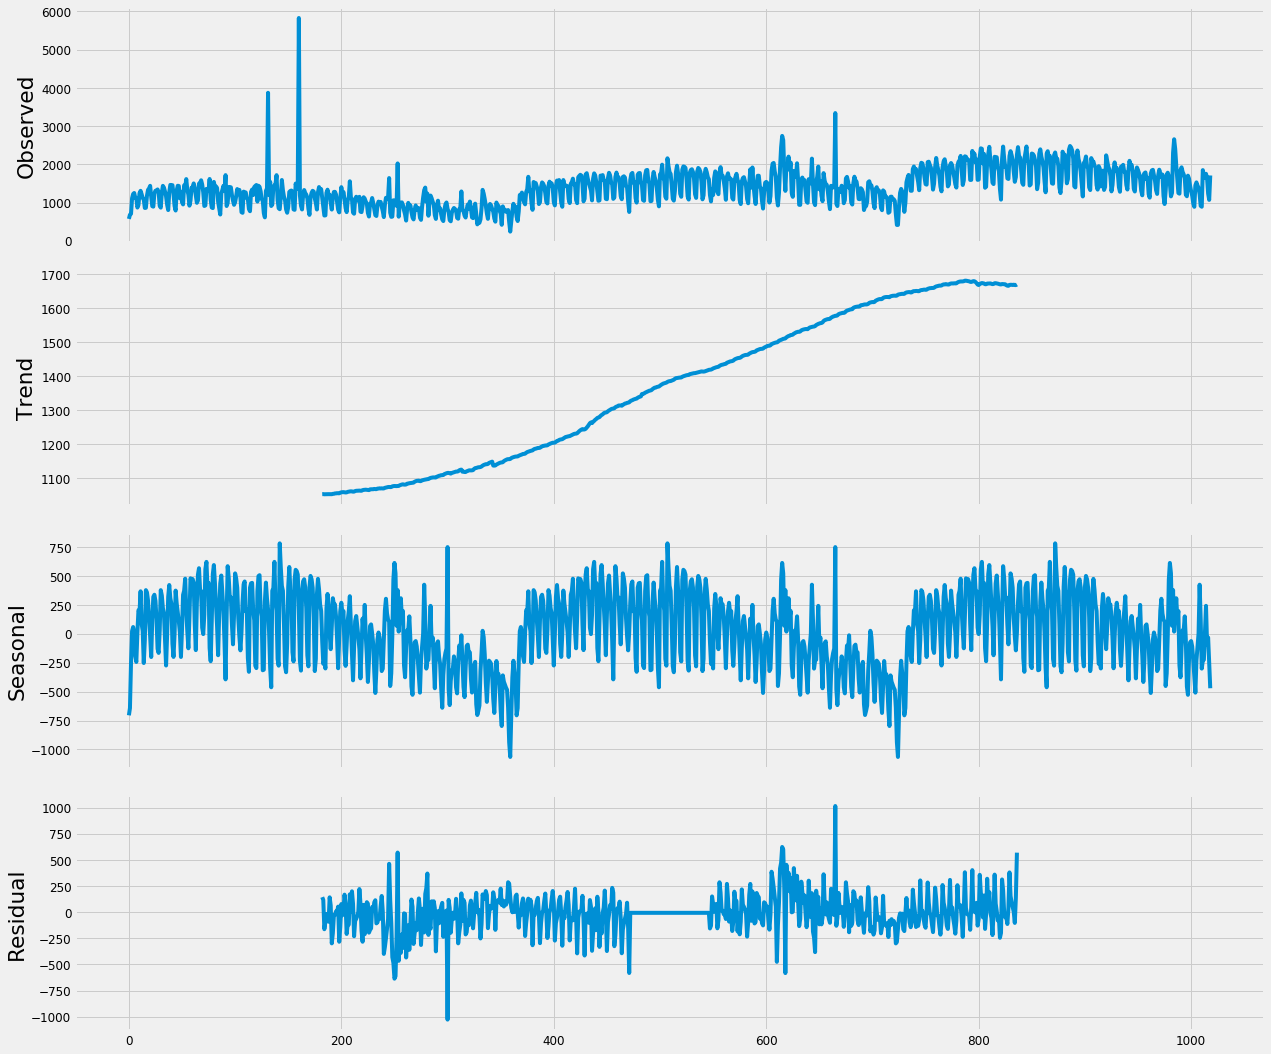

In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15

rnb_AMR_add = sm.tsa.seasonal_decompose(rnb_AMR['cb'], model='additive', freq = 365)
fig = rnb_AMR_add.plot()
plt.show()

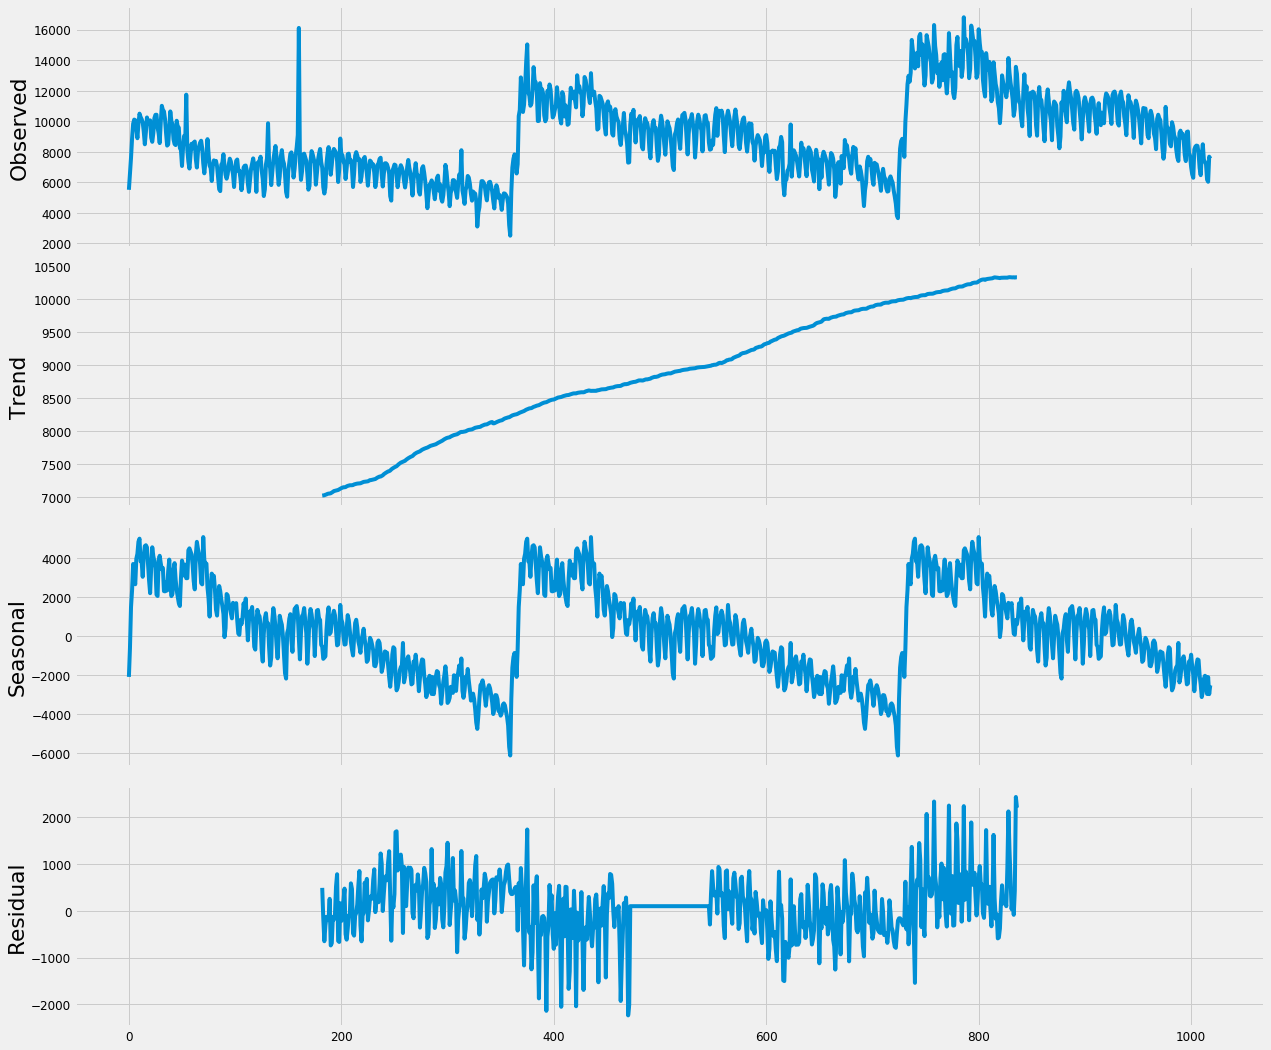

In [77]:
# NB
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15

rnb_AMR_add = sm.tsa.seasonal_decompose(rnb_AMR['nb'], model='additive', freq = 365)
fig = rnb_AMR_add.plot()
plt.show()

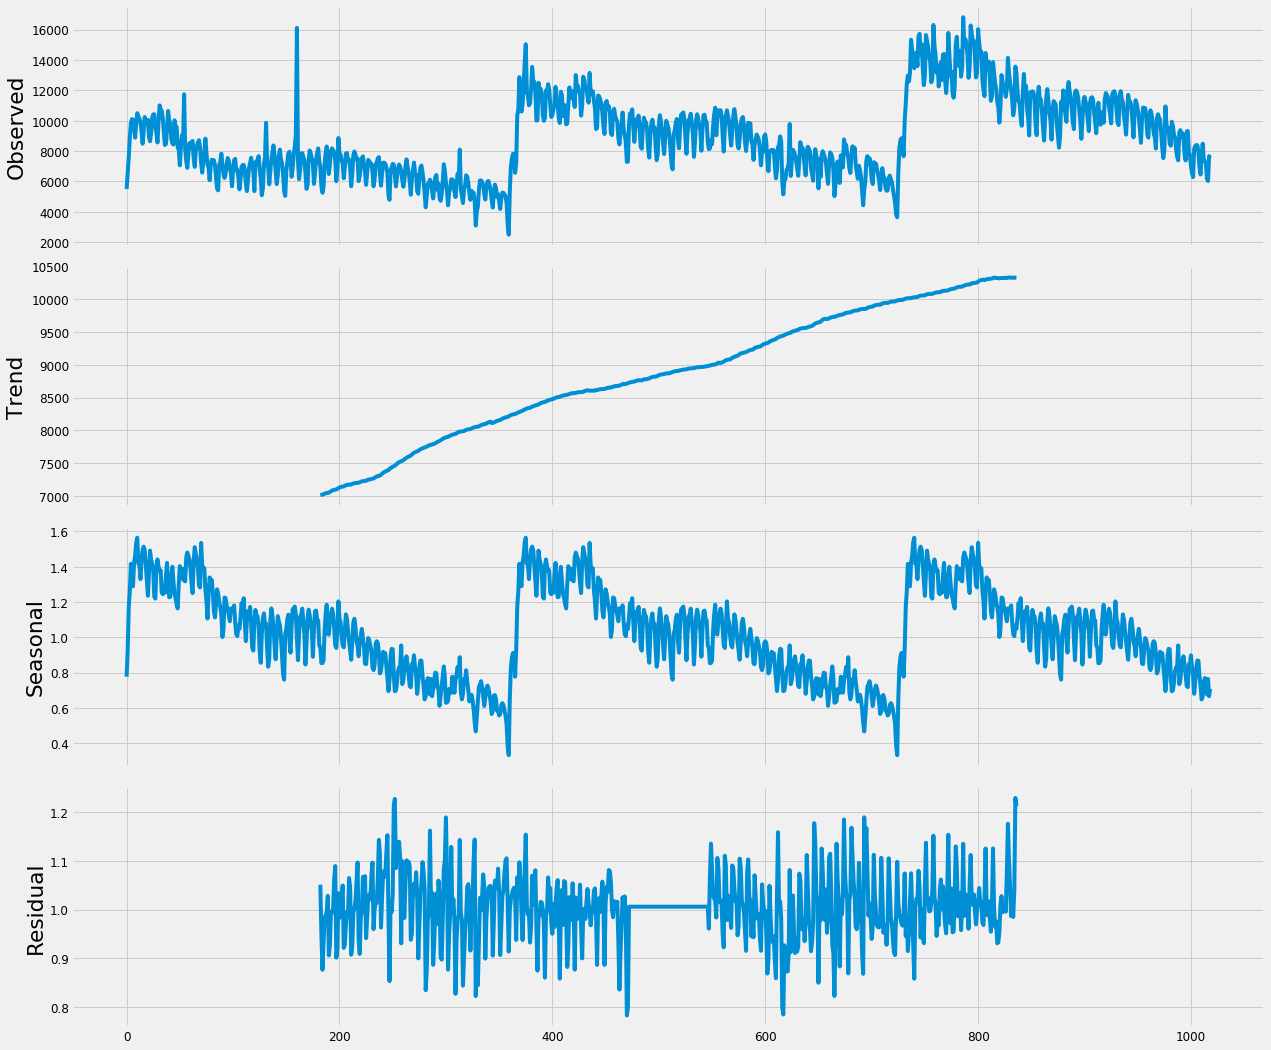

In [78]:
# NB
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15

rnb_AMR_add = sm.tsa.seasonal_decompose(rnb_AMR['nb'], model='multiplicative', freq = 365)
fig = rnb_AMR_add.plot()
plt.show()

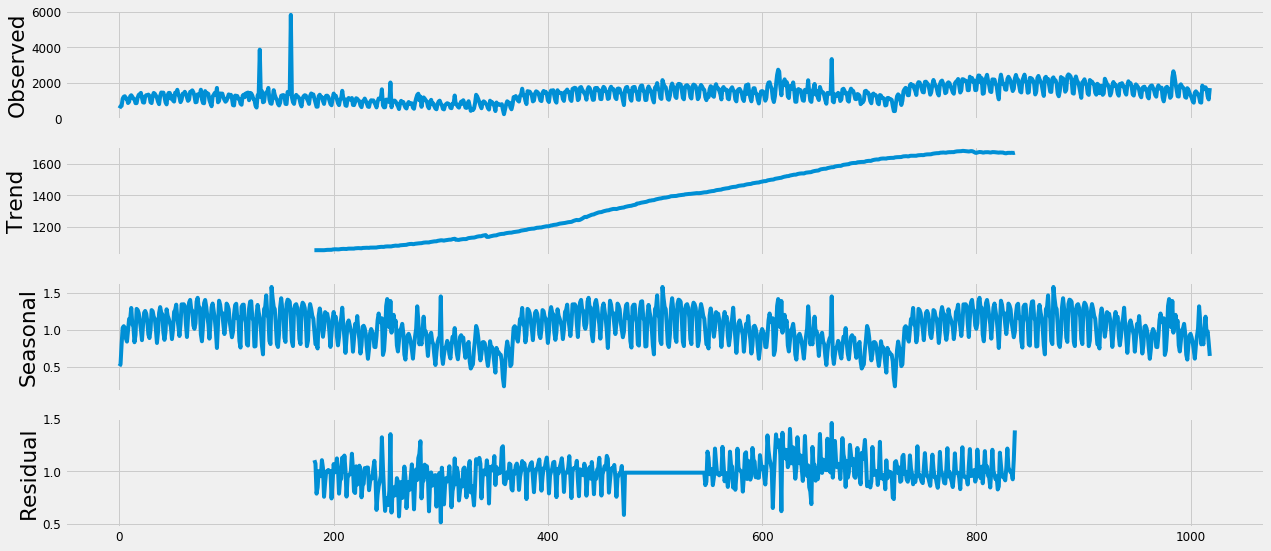

In [26]:
rnb_AMR_mul = sm.tsa.seasonal_decompose(rnb_AMR['cb'], model='multiplicative', freq = 365)
fig = rnb_AMR_mul.plot()
plt.show()

In [4]:
import pandas as pd

# Create data set
d = {'foo':[100, 111, 222], 
     'bar':[333, 444, 555]}
df = pd.DataFrame(d)

# Full dataframe:
df

# Shows:
#    bar   foo 
# 0  333   100
# 1  444   111
# 2  555   222

# Output only the row(s) in df where foo is 222:
df[df.foo == 222]

,foo,bar
2,222,555


In [5]:
df

,foo,bar
0,100,333
1,111,444
2,222,555


In [64]:
# COPY OVER UPDATED CLASS (AS OF 12/05/2018 @ 4:23 PM) TO TEST THE FUNCTION

# -*- coding: utf-8 -*-
"""
Created on Tue Nov  6 14:44:31 2018
@author: ahellman; akuppam; trenner
"""
import numpy as np
import pandas as pd
import itertools
#import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from fbprophet import Prophet
#from fbprophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import logging
import warnings
import pyper as pr


log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
logger = logging.getLogger(__name__)


class TimeSeriesMultiReg():
    
    def __init__(self):
        pass
    
    
    def _Run_Regressions(
        self,
        df,
        forecastDays,
        region="None",
        forecasts={"holtwinters", "arima", "sarima", "prophet", "r_arima", "r_sarima"}
    ):
        """This is the main working function to:
            1. break out the arrays from the dataset
            2. Call the other functions
            3. Run the MAPE on each of the functions"""
        
        df = self.format_df(df)
        

        actualsDict = self.dimensionDictionary(df)
        
        actualsDictKey = []
        for key in actualsDict:
            actualsDictKey.append(key)  
        
        # Fill dictionary with unique intersections of the actuals data:
        for i in range(0, len(actualsDictKey)):
            dfFiltered = df.iloc[0:,1].isin(actualsDictKey[i])
            for j in range(1, len(df.columns)-1):
                dfFiltered &= df.iloc[0:,j].isin(actualsDictKey[i])
            
            actualsDict[actualsDictKey[i]] = df[dfFiltered]
        # Fill dictionary with unique uintersections of the actuals data:

        # Dict mapping subdimensions to (model, forecast) tuples.
        # model, forecast = forecast_results[subdimension] <- how to call.
        forecast_results = {}
        
        # If 0 Dims, do this:
        if len(actualsDictKey) == 0:
            actualsDictKey.append('y')
            actualsDict['y'] = df[['y']]
        
        for subDimension in actualsDictKey:
            # Initialize the list of forecast results for the subdimension.
            forecast_results[subDimension] = []
            if "prophet" in forecasts:
                try:
                    if region == "None":
                        forecast_results[subDimension].append((
                            "Prophet",
                            self.ProphetFxnNone(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        ))
                    elif region == "NA":
                        forecast_results[subDimension].append((
                            "Prophet",
                            self.ProphetFxnNA(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        ))
                    elif region == "UK":
                        forecast_results[subDimension].append((
                            "Prophet",
                            self.ProphetFxnUK(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        ))
                    elif region == "FR":
                        forecast_results[subDimension].append((
                            "Prophet",
                            self.ProphetFxnFR(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        ))
                    elif region == "CE":
                        forecast_results[subDimension].append((
                            "Prophet",
                            self.ProphetFxnCE(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        ))
                    elif region == "SoEu":
                        forecast_results[subDimension].append((
                            "Prophet",
                            self.ProphetFxnSoEu(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        ))
                except Exception:
                    pass  # If we can't run this without generating exceptions, skip.
            
            if "holtwinters" in forecasts:
                try:
                    forecast_results[subDimension].append(
                        (
                            "HW",
                            self.HWFxn(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        )
                    )
                except Exception:
                    pass  # If we can't run this without generating exceptions, skip.
            
            if "sarima" in forecasts:
                try:
                    forecast_results[subDimension].append(
                        (
                            "Sarima",
                            self.SarimaFxn(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        )
                    )
                except Exception:
                    pass  # If we can't run this without generating exceptions, skip.
            
            if "r_sarima" in forecasts:
                try:
                    forecast_results[subDimension].append(
                        (
                            "r_Sarima",
                            self.r_SarimaFxn(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        )
                    )
                except Exception:
                    pass  # If we can't run this without generating exceptions, skip.
            
            if "r_arima" in forecasts:
                try:
                    forecast_results[subDimension].append(
                        (
                            "r_Arima",
                            self.r_ArimaFxn(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        )
                    )
                except Exception:
                    pass  # If we can't run this without generating exceptions, skip.
            
            if "arima" in forecasts:
                try:
                    forecast_results[subDimension].append(
                        (
                            "Arima",
                            self.ArimaFxn(
                                actualsDict[subDimension],
                                forecastDays
                            )
                        )
                    )
                except Exception as e:
                    logger.exception(
                        "Arima exception for ARIMA model, "
                        f"subdimension: {subDimension}."
                    )
                    raise e
                    # pass  # If we can't run this without generating exceptions, skip.
        
            # Bail if no forecasts were executed.
            if not forecast_results:
                raise ValueError(f"Unable to execute any forecasts for {subDimension}.")
        
        # A dictionary mapping the subdimensions to a list of (model, MAPE) tuples.
        # model, mape = mape_results[subdimension] <- how to call.
        mape_results = {}
        for subDimension in actualsDictKey:
            # Initialize to an empty list for the specified subdimension.
            mape_results[subDimension] = []
            for model, forecast in forecast_results[subDimension]:
                mape_results[subDimension].append((
                    model, 
                    self.mapeCalc(
                        forecast[:len(actualsDict[subDimension])],
                        actualsDict[subDimension]['y']
                    )
                ))
                #actualsDF = pd.DataFrame(actualsDict[subDimension].groupby('ds', as_index=False).sum()['y'])
                actualsDF = pd.DataFrame(actualsDict[subDimension]['y'])
                actualsDF.to_csv("DFactuals.csv")
                #forecastsDF = pd.DataFrame(forecast[:len(actualsDict[subDimension].groupby('ds', as_index=False).sum())])
                forecastsDF = pd.DataFrame(forecast[:len(actualsDict[subDimension])])
                forecastsDF.to_csv("DFforecasts.csv")


        # A dictionary mapping the subdimension to a tuple of (model, mape, forecast)
        # model, mape, forecast = bestMapes[dimension] <- Usage.
        bestModels = {}
        # A dictionary mapping the subdimension to a list of all (model, mape,
        # forecast) tuples.
        allModels = {}
        for subDimension in actualsDictKey:
            bestModel = None
            allModels[subDimension] = []
            for model_forecast, model_mape in zip(
                forecast_results[subDimension],
                mape_results[subDimension]
            ):
                model, forecast = model_forecast
                model, mape = model_mape

                allModels[subDimension].append((model, mape, forecast))
                
                logger.debug(f"SUBDIMENSION {subDimension}.")
                logger.debug(f"MODEL {model}.")
                logger.debug(f"MAPE {mape}.")

                if (bestModel is None) or (mape < bestModel[1]):
                    bestModel = (model, mape, forecast)
                
                logger.debug(f"BEST MODEL: {bestModel[0]}")
                logger.debug(f"BEST MAPE: {bestModel[1]}")
                logger.debug("="*80)
            bestModels[subDimension] = bestModel
        
        return bestModels, allModels


    def format_df(self, df):
        if 'ds' not in df.columns:
            try:
                df = df.rename(columns={'Date': 'ds'})
            except:
                df = df.rename(columns={'date': 'ds'})
        
        if 'y' not in df.columns:
            try:
                df = df.rename(columns={df.columns[len(df.columns)-1:][0]: 'y'})
            except:
                pass
        
        return df

    
    def mapeCalc(self, pf, xf):
        
        pf = pf.reset_index().drop(columns=['index'])
        xf = xf.reset_index().drop(columns=['index'])
        dff = pd.concat([pf,xf],axis=1)
        dff.columns = ['predict', 'real']
        dff['abspctdiff'] = abs(dff['predict']-dff['real'])/dff['real']
        mape = np.mean(dff['abspctdiff'])
        pfDF = pd.DataFrame(pf)
        pfDF.to_csv("DFpf.csv")
        xfDF = pd.DataFrame(xf)
        xfDF.to_csv("DFxf.csv")
        dffDF = pd.DataFrame(dff)
        dffDF.to_csv("DFdff.csv")

        return mape
    

    def dimensionDictionary(self, df):
        
        # Build new arrays to store the individual forecasts - all of this will be stored in a dictionary
        actualsDict = {} #Dictionary to hold all the dataframes of the forecasts
        actualsDictKey = [] #Arry to hold all the dictionary keys
    
        uniqueList = [] #Find and store all the uniqe dimensions of the data
        for i in range(0,len(df.columns)):
            if df.columns[i] != 'ds' and df.columns[i] != 'y':
                uniqueList.append(pd.unique(df.iloc[0:,i].values))
        
        #Combine the arrays in the uniqueList dic into one array of all combinations:
        iterList = list(itertools.product(*uniqueList))
        for i in iterList:
            actualsDictKey.append(i)
        
        #Add an empty array into all the intersectons of the unique values
        for i in range(0, len(actualsDictKey)):
            actualsDict[actualsDictKey[i]] = []
            
        return actualsDict
       
        
    def ProphetFxnNA(self, df, daysForecast):
        
        easter = pd.DataFrame({
          'holiday': 'easterSunday',
          'ds': pd.to_datetime(['2010-04-04','2011-04-24','2012-04-08','2013-03-31','2014-04-20',
                                '2015-04-05','2016-03-27','2017-04-16','2018-04-01','2019-04-21',
                                '2020-04-12','2021-04-04','2022-04-17','2023-04-09','2024-03-31']),
          'lower_window': -2,
          'upper_window': 0,
        })
    
        memorial = pd.DataFrame({
          'holiday': 'memorialMonday',
          'ds': pd.to_datetime(['2010-05-31','2011-05-30','2012-05-28','2013-05-27','2014-05-26',
                                '2015-05-25','2016-05-30','2017-05-29','2018-05-28','2019-05-27',
                                '2020-05-25','2021-05-31','2022-05-30','2023-05-29','2024-05-27']),
          'lower_window': -2,
          'upper_window': 0,
        })
    
        laborday = pd.DataFrame({
          'holiday': 'laborMonday',
          'ds': pd.to_datetime(['2010-09-6','2011-09-5','2012-09-3','2013-09-2','2014-09-1',
                                '2015-09-7','2016-09-5','2017-09-4','2018-09-3','2019-09-2',
                                '2020-09-7','2021-09-6','2022-09-5','2023-09-4','2024-09-2']),
          'lower_window': -2,
          'upper_window': 0,
        })
        
        thxgiving = pd.DataFrame({
          'holiday': 'thanksgiving',
          'ds': pd.to_datetime(['2010-11-25','2011-11-24','2012-11-22','2013-11-28','2014-11-27',
                                '2015-11-26','2016-11-24','2017-11-23','2018-11-22','2019-11-28',
                                '2020-11-26','2021-11-25','2022-11-24','2023-11-23','2024-11-28',]),
          'lower_window': 0,
          'upper_window': 1,
        })
    
        holidays = pd.concat((easter, memorial, laborday, thxgiving))
        
        m = Prophet(holidays=holidays, daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,
                   seasonality_mode='multiplicative')
        m.fit(df)
        future = m.make_future_dataframe(periods=daysForecast) #Make a new dataframe that predicts the next number of days    
        forecast = m.predict(future)
        return forecast['yhat']

    
    def ProphetFxnCE(self, df, daysForecast):
    
        easter = pd.DataFrame({
              'holiday': 'easterSunday',
              'ds': pd.to_datetime(['2010-04-04','2011-04-24','2012-04-08','2013-03-31','2014-04-20',
                                    '2015-04-05','2016-03-27','2017-04-16','2018-04-01','2019-04-21',
                                    '2020-04-12','2021-04-04','2022-04-17','2023-04-09','2024-03-31']),
              'lower_window': -2,
              'upper_window': 1,
            })
        
        ascensionDay = pd.DataFrame({
              'holiday': 'ascensionDay',
              'ds': pd.to_datetime(['2014-05-29','2015-05-14','2016-05-05','2017-05-25','2018-05-10',
                                    '2019-05-30','2020-05-21','2021-05-13','2022-05-26','2023-05-18','2024-05-09',]),
              'lower_window': 0,
              'upper_window': 2,
            })
        
        whit = pd.DataFrame({
              'holiday': 'whitMonday',
              'ds': pd.to_datetime(['2014-06-09','2015-05-25','2016-05-16','2017-06-05','2018-05-21',
                                    '2019-06-10','2020-06-01','2021-05-24','2022-06-06','2023-05-29','2024-05-20',]),
              'lower_window': -1,
              'upper_window': 0,
            })
        
        holidays = pd.concat((easter, ascensionDay, whit))
    
        m = Prophet(holidays=holidays, daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,
                   seasonality_mode='multiplicative')
        m.fit(df)
        future = m.make_future_dataframe(periods=daysForecast) #Make a new dataframe that predicts the next number of days    
        forecast = m.predict(future)
        return forecast['yhat']
    

    def ProphetFxnFR(self, df, daysForecast):
        
        easter = pd.DataFrame({
              'holiday': 'easterSunday',
              'ds': pd.to_datetime(['2010-04-04','2011-04-24','2012-04-08','2013-03-31','2014-04-20',
                                    '2015-04-05','2016-03-27','2017-04-16','2018-04-01','2019-04-21',
                                    '2020-04-12','2021-04-04','2022-04-17','2023-04-09','2024-03-31']),
              'lower_window': -2,
              'upper_window': 1,
            })
        
        ascensionDay = pd.DataFrame({
              'holiday': 'ascensionDay',
              'ds': pd.to_datetime(['2014-05-29','2015-05-14','2016-05-05','2017-05-25','2018-05-10',
                                    '2019-05-30','2020-05-21','2021-05-13','2022-05-26','2023-05-18','2024-05-09',]),
              'lower_window': 0,
              'upper_window': 2,
            })
        
        whit = pd.DataFrame({
              'holiday': 'whitMonday',
              'ds': pd.to_datetime(['2014-06-09','2015-05-25','2016-05-16','2017-06-05','2018-05-21',
                                    '2019-06-10','2020-06-01','2021-05-24','2022-06-06','2023-05-29','2024-05-20',]),
              'lower_window': -1,
              'upper_window': 0,
            })
        
        holidays = pd.concat((easter, ascensionDay, whit))
        
        m = Prophet(holidays=holidays, daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,
                   seasonality_mode='multiplicative')
        m.fit(df)
        future = m.make_future_dataframe(periods=daysForecast) #Make a new dataframe that predicts the next number of days    
        forecast = m.predict(future)
        return forecast['yhat']
    

    def ProphetFxnNone(self, df, daysForecast):
    
        m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,
                   seasonality_mode='multiplicative')
        m.fit(df)
        future = m.make_future_dataframe(periods=daysForecast) #Make a new dataframe that predicts the next number of days    
        forecast = m.predict(future)
        return forecast['yhat']
    

    def ProphetFxnSoEu(self, df, daysForecast):
        
        easter = pd.DataFrame({
              'holiday': 'easterSunday',
              'ds': pd.to_datetime(['2010-04-04','2011-04-24','2012-04-08','2013-03-31','2014-04-20',
                                    '2015-04-05','2016-03-27','2017-04-16','2018-04-01','2019-04-21',
                                    '2020-04-12','2021-04-04','2022-04-17','2023-04-09','2024-03-31']),
              'lower_window': -2,
              'upper_window': 1,
            })
        
        holidays = pd.concat((easter))
        
        m = Prophet(holidays=holidays, daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,
                   seasonality_mode='multiplicative')
        m.fit(df)
        future = m.make_future_dataframe(periods=daysForecast) #Make a new dataframe that predicts the next number of days    
        forecast = m.predict(future)
        return forecast['yhat']
    
    
    def ProphetFxnUK(self, df, daysForecast):
    
        easter = pd.DataFrame({
              'holiday': 'easterSunday',
              'ds': pd.to_datetime(['2015-04-05','2016-03-27','2017-04-16','2018-04-01','2019-04-21',
                                    '2020-04-12','2021-04-04','2022-04-17','2023-04-09','2024-03-31','2025-04-20']),
            
              'lower_window': -2,
              'upper_window': 1,
            })
        
        #First monday in may
        mayDay = pd.DataFrame({
              'holiday': 'mayday',
              'ds': pd.to_datetime(['2015-05-04','2016-05-02','2017-05-01','2018-05-07','2019-05-06',
                                    '2020-05-04','2021-05-03','2022-05-02','2023-05-01','2024-05-06','2025-05-05']),
              'lower_window': -1,
              'upper_window': 0,
            })
        
        #Last monday in may
        springBank = pd.DataFrame({
              'holiday': 'springbank',
              'ds': pd.to_datetime(['2015-05-25','2016-05-30','2017-05-29','2018-05-28','2019-05-27',
                                    '2020-05-25','2021-05-31','2022-05-30','2023-05-29','2024-05-27','2025-05-26']),
              'lower_window': -1,
              'upper_window': 0,
            })
        
        summerbank = pd.DataFrame({
              'holiday': 'springbank',
              'ds': pd.to_datetime(['2015-08-31','2016-08-29','2017-08-28','2018-08-27','2019-08-26','2020-08-31',
                                    '2021-08-30','2022-08-29','2023-08-28','2024-08-26','2025-08-25']),
              'lower_window': -1,
              'upper_window': 0,
        })
        holidays = pd.concat((easter, mayDay, springBank, summerbank))
        
        m = Prophet(holidays=holidays, daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,
                   seasonality_mode='multiplicative')
        m.fit(df)
        future = m.make_future_dataframe(periods=daysForecast) #Make a new dataframe that predicts the next number of days    
        forecast = m.predict(future)
        return forecast['yhat']
    
    
    def SarimaFxn(self, df, fcstdays):

        series = df['y']
    
        # evaluate parameters
        p_values = range(0, 6)
        d_values = range(0, 2)
        q_values = range(0, 6)
        P_values = range(0, 6)
        D_values = range(0, 2)
        Q_values = range(0, 6)
        m = 365
    
        best_score, best_params, best_seasonal_params = float("inf"), None, None
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    for P in P_values:
                        for D in D_values:
                            for Q in Q_values:
                                order = (p,d,q)
                                sorder = (P,D,Q,m)
                                try:
                                    mse = self.evaluate_sarima_model(series, order, sorder, fcstdays)
                                    if mse < best_score:
                                        best_score, best_params, best_seasonal_params = mse, order, sorder
                                except:
                                    # TODO: Logging.
                                    pass
    
        # apply model
        model = sm.tsa.statespace.SARIMAX(series,
                                          order=(best_params[0],best_params[1],best_params[2]),
                                          seasonal_order=(best_seasonal_params[0],best_seasonal_params[1],best_seasonal_params[2],m),
                                          enforce_stationarity=True,
                                          enforce_invertibility=True)
        model_fit = model.fit(transparams=True, method='nm')
        logger.debug(model_fit.summary())
    
        pred_fcst = model_fit.predict(start=0, end=len(df['y'])-1, dynamic=False)
        sarima_forecast = model_fit.forecast(fcstdays)
        sarima_series = pred_fcst.append(sarima_forecast)
    
        return sarima_series

    
    def evaluate_sarima_model(self, X, order, sorder, fcstdays):
        # make predictions
        predictions = list()
        model = sm.tsa.statespace.SARIMAX(X,order=order,
                                          seasonal_order=sorder,
                                          enforce_stationarity=True,
                                          enforce_invertibility=True)
        model_fit = model.fit(transparams=True, method='nm')
        predictions = model_fit.predict(start=0, end=len(X)-1, dynamic=False)
        error = mean_squared_error(X, predictions)
        logger.debug(f'SARIMA error = {error}.')
        return error
    
    
    def HWFxn(self, df, fcstdays):

        series = df['y']

        # evaluate parameters
        t_params = ['add', 'mul', None]
        d_params = [True, False]
        s_params = ['add', 'mul', None]
        p = 365
        b_params = [True, False]
        r_params = [True, False]

        best_score, best_params = float("inf"), None
        series = series.astype('double')
        for t in t_params:
            for d in d_params:
                for s in s_params:
                    for b in b_params:
                        for r in r_params:
                            params = (t,d,s,p,b,r)
                            try:
                                mse = self.evaluate_hw_model(series, params, fcstdays)
                                if mse < best_score:
                                    best_score, best_params = mse, params
                                logger.debug(f'HW params {params}.')
                            except Exception as e:
                                logger.exception(
                                    "Encountered error in Holt-Winters for "
                                    f"parameters {str(params)}."
                                )
                                pass
        # apply model
        model = ExponentialSmoothing(series, trend=best_params[0], damped=best_params[1], seasonal=best_params[2], seasonal_periods=best_params[3])
        model_fit = model.fit(optimized=True, use_boxcox=best_params[4], remove_bias=best_params[5], use_brute=False)
        logger.debug(model_fit.summary())
    
        pred_fcst = model_fit.fittedvalues
        hw_forecast = model_fit.forecast(fcstdays)
        hw_series = pred_fcst.append(hw_forecast)
    
        return hw_series

    
    def evaluate_hw_model(self, X, hw_params, fcstdays):
        (t,d,s,p,b,r) = hw_params
        # make predictions
        predictions = list()
        model = ExponentialSmoothing(X, trend=t, damped=d, seasonal=s, seasonal_periods=365)
        model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r, use_brute=False)
        predictions = model_fit.fittedvalues
        error = mean_squared_error(X, predictions)
        logger.debug(f'Holt Winters error = {error}, params = {hw_params}.')
        return error
    
    def ArimaFxn(self, df, fcstdays):

        series = df['y']

        # evaluate parameters
        p_values = range(0, 6)
        d_values = range(0, 2)
        q_values = range(0, 6)

        best_score, best_params = float("inf"), None
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    order = (p,d,q)
                    try:
                        mse = self.evaluate_arima_model(series, order, fcstdays)
                        if mse < best_score:
                            best_score, best_params = mse, order

                            logger.debug('ARIMA %s MSE=%.3f' % (order, mse))
                            logger.debug('Best ARIMA %s MSE=%.3f' % (best_params, best_score))
                            logger.debug('Best Params: ', best_params)
                    except Exception as e:
                        logger.exception(
                            "Encountered error fitting ARIMA for order "
                            f"{str(order)}."
                        )
                        pass

        # apply model
        model = ARIMA(series, order=(best_params[0],best_params[1],best_params[2]))
        model_fit = model.fit(transparams=True, disp=0)
        logger.debug(model_fit.summary())

        pred_fcst = model_fit.predict(start=1, end=len(df['y'])-1, dynamic=False)
        arima_forecast = model_fit.forecast(fcstdays)[0]
        af = pd.Series(arima_forecast)
        arima_series = pred_fcst.append(af)

        return arima_series


    def evaluate_arima_model(self, X, order, fcstdays):

        if X.dtype == np.int64:
            X = X.astype(np.float64)

        # make predictions
        predictions = list()
        model = ARIMA(X,order=order)
        model_fit = model.fit(transparams=True, disp=0)
        predictions = model_fit.predict(start=1, end=len(X), dynamic=False)
        error = mean_squared_error(X, predictions)
        logger.debug(f'ARIMA error = {error}.')
        return error
    
    def r_ArimaFxn(self, X, fcstdays):
        X = X['y']
        r = pr.R()
        r.assign("rDF", X)
        r.assign("h", fcstdays)
        r("library(forecast)")
        r("model_order <- auto.arima(rDF, seasonal = T)")
        r("ts_data <- ts(rDF, start=2016,freq=365)")
        r("fit <- stlm(ts_data, modelfunction=Arima, order=arimaorder(model_order))")
        r("fit_arima_fc <- forecast(fit, h=h)")
        r("df_arima <- c(fit_arima_fc$fitted, fit_arima_fc$mean)")
        r_arima_series = pd.DataFrame(r.get("df_arima"))
        r_arima_series = r_arima_series[0].values
        return r_arima_series

    def r_SarimaFxn(self, X, fcstdays):
        X = X['y'].values
        r = pr.R()
        r.assign("rDF", X)
        r.assign("h", fcstdays)
        r("library(forecast)")
        r("ts_data <- ts(rDF, start=2016,freq=365)")
        r("model_sorder <- auto.arima(ts_data, D=1)")
        r("asorder <- model_sorder$arma[c(1, 6, 2, 3, 7, 4, 5)]")
        r("names(asorder) <- c('p', 'd', 'q', 'P', 'D', 'Q', 'Frequency')")
        r("model_fit_s <- stlm(ts_data, modelfunction=Arima,order=c(asorder[1],asorder[2],asorder[3]),seasonal=list(order=c(asorder[4],asorder[5],asorder[6])))")
        r("fit_sarima_fc <- forecast(model_fit_s, h=h)")    
        r("df_sarima <- c(fit_sarima_fc$fitted, fit_sarima_fc$mean)")
        r_sarima_series = pd.DataFrame(r.get("df_sarima"))
        r_sarima_series = r_sarima_series[0].values
        return r_sarima_series

In [ ]:
import pandas as pd
rnb = pd.read_csv('test_data_6m.csv')
rnb_seo = rnb[(rnb.Mrkt == 'SEO')]
rnb_seo = rnb_seo.reset_index().drop(columns=['index'])
Y = rnb_seo['y']
Y.head()

In [65]:
import pandas as pd
data = pd.read_csv('test_data_6m.csv')
#data = pd.read_csv('NA_NB_1_20181126.csv')
#data = pd.read_csv('rnb1015_2_All.csv')
data.shape
data.head()

,Date,RLT Marketing Channel,nb
0,7/1/17,Undefined,1225
1,7/1/17,Direct,1732
2,7/1/17,Display,256
3,7/1/17,Email,1262
4,7/1/17,Partner,885


In [66]:
model = TimeSeriesMultiReg()

import warnings
warnings.filterwarnings("ignore")
#x_all_test_6m = model._Run_Regressions(data, 365, forecasts={"holtwinters","arima","prophet","r_arima","r_sarima"})
x_r_test_6m = model._Run_Regressions(data, 365, forecasts={"r_arima","r_sarima"})
# ---------
#x_arima = model._Run_Regressions(data, 365, forecasts={"arima"})
#x_all = model._Run_Regressions(data, 365)
# ----------
#x_hw_arima_prophet_test_6m = model._Run_Regressions(data, 365, forecasts={"holtwinters","arima","prophet"})
#x_hw_arima_prophet_all_NA_NB = model._Run_Regressions(data, 365, forecasts={"holtwinters","arima","prophet"})
#x_hw_arima_prophet_all_rnb = model._Run_Regressions(data, 365, forecasts={"holtwinters","arima","prophet"})
#x_hw_arima_prophet_sarima_all_rnb = model._Run_Regressions(data, 365, forecasts={"holtwinters","arima","sarima","prophet"})
# ----------
#x_hw_all_rnb = model._Run_Regressions(data, 365, forecasts={"holtwinters"})
#x_sarima = model._Run_Regressions(data, 365, forecasts={"sarima"})
#x_prophet = model._Run_Regressions(data, 365, forecasts={"prophet"})

In [5]:
with open('x_all_test_6m.txt', 'w') as f:
    print(x_all_test_6m, file=f)

In [67]:
with open('x_r_test_6m.txt', 'w') as f:
    print(x_r_test_6m, file=f)

In [41]:
import pandas as pd
import pyper as pr

def r_ArimaFxn(X, fcstdays):
    X = df['y']
    r = pr.R()
    r.assign("rDF", X)
    r.assign("h", fcstdays)
    r("library(forecast)")
    r("model_order <- auto.arima(rDF, seasonal = T)")
    r("ts_data <- ts(rDF, start=2016,freq=365)")
    r("fit <- stlm(ts_data, modelfunction=Arima, order=arimaorder(model_order))")
    r("fit_arima_fc <- forecast(fit, h=h)")
    r("df_arima <- c(fit_arima_fc$fitted, fit_arima_fc$mean)")
    r_arima_series = pd.DataFrame(r.get("df_arima"))
    r_arima_series = r_arima_series[0].values
    return r_arima_series

In [44]:
import pandas as pd
data = pd.read_csv('test_data_6m.csv')
#data = pd.read_csv('NA_NB_1_20181126.csv')
#data = pd.read_csv('rnb1015_2_All.csv')
data.shape
data.head()

,Date,RLT Marketing Channel,nb
0,7/1/17,Undefined,1225
1,7/1/17,Direct,1732
2,7/1/17,Display,256
3,7/1/17,Email,1262
4,7/1/17,Partner,885


In [45]:
data1 = data['nb'].values

In [46]:
rfc = r_ArimaFxn(data1, 442)

In [47]:
rfc

array([1223.41427408, 1926.3289278 ,  760.82283158, ...,  503.45140225,
       1258.90539871, 1770.59654966])

In [31]:
rfc1 = rfc[0].values

In [32]:
rfc1

array([5493.08047002, 6725.73944247, 8143.32812825, ..., 9103.91745884,
       8864.15680624, 8407.92453558])

In [5]:
# r("write.csv(fit_arima_fc_cb, 'cb_arima_pred_fc.csv')")
rfc.to_csv('rfc.csv')

In [16]:
import pandas as pd
rnb = pd.read_csv('test_data_6m.csv')
rnb_seo = rnb[(rnb.Mrkt == 'SEO')]
rnb_seo = rnb_seo.reset_index().drop(columns=['index'])
Y = rnb_seo['y']
Y.head()

0    2363
1    2466
2    2580
3    2619
4    2960
Name: y, dtype: int64

In [6]:
import pandas as pd
import pyper as pr

def r_SarimaFxn(X, fcstdays):
    r = pr.R()
    r.assign("rDF", X)
    r.assign("h", fcstdays)
    r("library(forecast)")
    r("ts_data <- ts(rDF, start=2016,freq=365)")
    r("model_sorder <- auto.arima(ts_data, D=1)")
    r("asorder <- model_sorder$arma[c(1, 6, 2, 3, 7, 4, 5)]")
    r("names(asorder) <- c('p', 'd', 'q', 'P', 'D', 'Q', 'Frequency')")
    r("model_fit_s <- stlm(ts_data, modelfunction=Arima,order=c(asorder[1],asorder[2],asorder[3]),seasonal=list(order=c(asorder[4],asorder[5],asorder[6])))")
    r("fit_sarima_fc <- forecast(model_fit_s, h=h)")    
    r("df_sarima <- c(fit_sarima_fc$fitted, fit_sarima_fc$mean)")
    r_sarima_series = pd.DataFrame(r.get("df_sarima"))
    return r_sarima_series

In [7]:
rfcs = r_SarimaFxn(X, 442)

In [9]:
rfcs.to_csv('rfcs.csv')

In [8]:
rfcs # these are exactly same as R predictions for AMR_NotPaid (Test9v3speed)

,0
0,5496.005005
1,6511.426775
2,7601.560078
3,8870.428483
4,9827.781322
5,10102.127211
6,10063.141743
7,9559.350112
8,8881.907172
9,9820.633931


In [26]:
r = pr.R()
r.assign("rDF", Y)
r.assign("h", 442)
r("library(forecast)")
r("ts_data <- ts(rDF, start=2016,freq=365)")

'try({ts_data <- ts(rDF, start=2016,freq=365)})\n'

In [27]:
r("model_sorder <- auto.arima(ts_data, D=1)")

'try({model_sorder <- auto.arima(ts_data, D=1)})\nError in if (length(dx) > ncol(dxreg)) lm(dx ~ dxreg - 1, na.action = na.omit) else list(rank = 0L) : \n  argument is of length zero\n'

In [ ]:
r("asorder <- model_sorder$arma[c(1, 6, 2, 3, 7, 4, 5)]")
r("names(asorder) <- c('p', 'd', 'q', 'P', 'D', 'Q', 'Frequency')")
r("model_fit_s <- stlm(ts_data, modelfunction=Arima,order=c(asorder[1],asorder[2],asorder[3]),seasonal=list(order=c(asorder[4],asorder[5],asorder[6])))")
r("fit_sarima_fc <- forecast(model_fit_s, h=h)")    
r("df_sarima <- c(fit_sarima_fc$fitted, fit_sarima_fc$mean)")
r_sarima_series = pd.DataFrame(r.get("df_sarima"))

In [79]:
data = rnb[(rnb.region == 'CE') & (rnb.marketing == 'NotPaid')]
# to drop current index adn create a new one in sequence
data = data.reset_index().drop(columns=['index'])
#pf = pf.reset_index().drop(columns=['index'])
data.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,2016-01-01,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.78241,3062480
1,2016-01-02,CE,NotPaid,234775,750,11475,598,40,558,45223.51208,18670.38320,3052592
2,2016-01-03,CE,NotPaid,312498,1011,16040,831,41,790,35371.42787,22560.42286,3054960
3,2016-01-04,CE,NotPaid,268226,853,13262,809,48,761,109068.37570,20806.83668,3060960
4,2016-01-05,CE,NotPaid,254169,735,13269,703,74,629,120676.30190,16649.79245,3064848


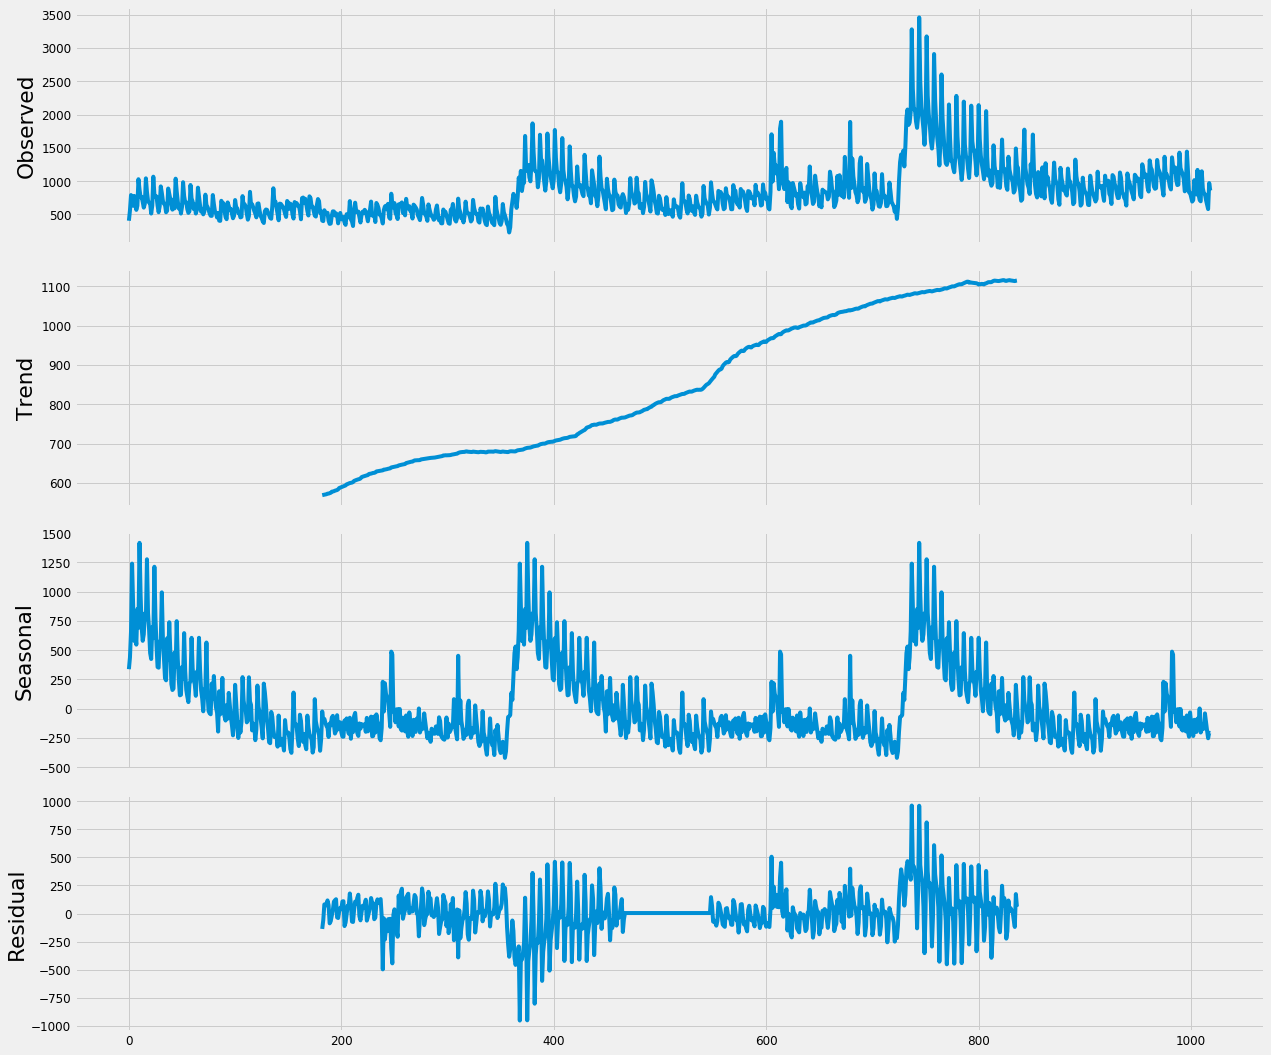

In [85]:
# NB
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15

#for cols in data.columns.tolist()[3:]:
#    data = data.ix[data[cols] > 0]

data_add = sm.tsa.seasonal_decompose(data['nb'], model='additive', freq = 365)
fig = data_add.plot()
plt.show()

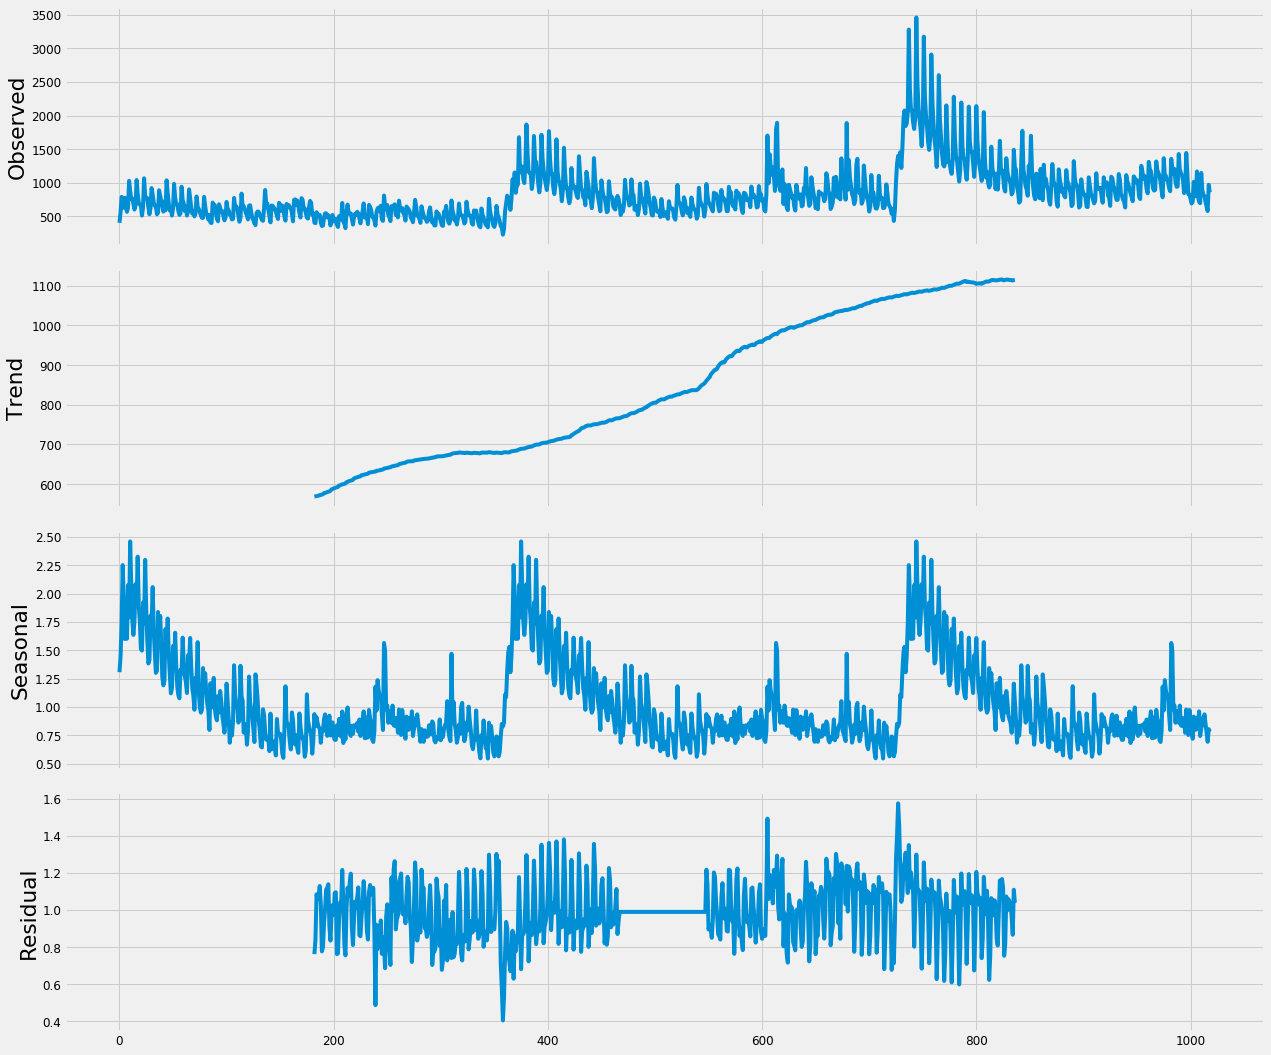

In [86]:
# NB
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15

for cols in data.columns.tolist()[3:]:
    data = data.ix[data[cols] > 0]

data_mul = sm.tsa.seasonal_decompose(data['nb'], model='multiplicative', freq = 365)
fig = data_mul.plot()
plt.show()